In [840]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from kneed import KneeLocator

In [841]:
def read_csv(a, b, path, scaling):
    x = []
    y = []
    users = []
    x_label = ""
    y_label = ""
    reader = ''
    with open(path) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        lines = 0
        for row in reader:
            if lines >= 1:
                #print(', '.join(row))
                x.append(float(row[a]))
                y.append(float(row[b]))
                users.append(row[0])
                lines += 1
            else:
                x_label = row[a]
                y_label = row[b]
                #print(', '.join(row))
                lines += 1
    
    og_x, og_y = x, y
    if(scaling == "std"):
        x, y = (np.array(x) - np.array(x).mean())/(np.array(x).std()), (np.array(y) - np.array(y).mean())/(np.array(y).std())
    elif(scaling == "norm"):
        x, y = normalize(np.array(x)[:, np.newaxis], axis=0).ravel(), normalize(np.array(y)[:, np.newaxis], axis=0).ravel()
    
    return x, y, x_label, y_label, users, pd.read_csv(path),og_x, og_y

# Choose Category
a, b = 2, 9
x, y, x_label, y_label, users, csv_data, og_x, og_y = read_csv(a, b, 'tripadvisor_review.csv', 'std')

In [842]:
print(csv_data.describe())
print("Null Value =",csv_data.isnull().sum().sum()==1)

       Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
count  980.000000  980.000000  980.000000  980.000000  980.000000  980.000000   
mean     0.893194    1.352612    1.013306    0.532500    0.939735    1.842898   
std      0.326912    0.478280    0.788607    0.279731    0.437430    0.539538   
min      0.340000    0.000000    0.130000    0.150000    0.060000    0.140000   
25%      0.670000    1.080000    0.270000    0.410000    0.640000    1.460000   
50%      0.830000    1.280000    0.820000    0.500000    0.900000    1.800000   
75%      1.020000    1.560000    1.572500    0.580000    1.200000    2.200000   
max      3.220000    3.640000    3.620000    3.440000    3.300000    3.760000   

       Category 7  Category 8  Category 9  Category 10  
count  980.000000  980.000000  980.000000   980.000000  
mean     3.180939    2.835061    1.569439     2.799224  
std      0.007824    0.137505    0.364629     0.321380  
min      3.160000    2.420000    0.740000 

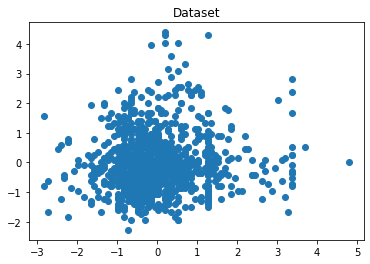

In [843]:
plt.plot()
plt.title('Dataset')
plt.scatter(x, y)
plt.show()

In [844]:
X = np.array(list(zip(x, y))).reshape(len(x), 2)
X

array([[ 0.93588703,  0.68751758],
       [ 1.77264397,  0.797274  ],
       [-1.15600533, -0.71187679],
       ...,
       [-0.06822131, -0.62955947],
       [-2.41114075, -1.23321978],
       [-1.6580595 , -0.62955947]])

In [845]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 21)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

c:\Users\DA4\anaconda3\envs\tensor-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\DA4\anaconda3\envs\tensor-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [846]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.1987848986552228
2 : 0.965536698216973
3 : 0.7934470815375512
4 : 0.7057539008318504
5 : 0.6548463442309208
6 : 0.6012073753162739
7 : 0.5581366355857031
8 : 0.5289713629964555
9 : 0.49952125889581867
10 : 0.467085949010191
11 : 0.4397314253944224
12 : 0.4322928253143278
13 : 0.41997057710250113
14 : 0.39907599246913744
15 : 0.3843963147590078
16 : 0.37405055250820907
17 : 0.3635254579159817
18 : 0.3523769988651652
19 : 0.33970384645195395
20 : 0.32942961069938825


Distortion K-Means : 6


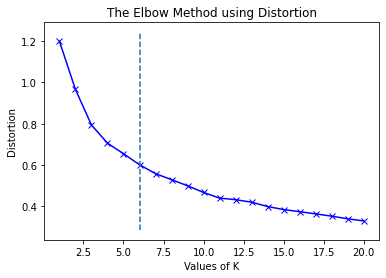

In [847]:
kn_dist = KneeLocator(K, distortions, curve='convex', direction='decreasing')
print(f'Distortion K-Means : {kn_dist.knee}')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.vlines(kn_dist.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [848]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 1960.0000000000007
2 : 1314.7835620836272
3 : 853.809215724335
4 : 685.2230919545872
5 : 562.3474039855563
6 : 474.37365255640793
7 : 409.3287855140466
8 : 357.6920059562106
9 : 320.60669284985005
10 : 288.46688349316054
11 : 266.0906318051654
12 : 244.91757657002893
13 : 225.63270516864026
14 : 207.0593747221422
15 : 193.30117911637254
16 : 180.7987317200756
17 : 166.36643287693198
18 : 159.5085250914594
19 : 147.37627686227455
20 : 141.2303139232263


Inertia K-Means : 5


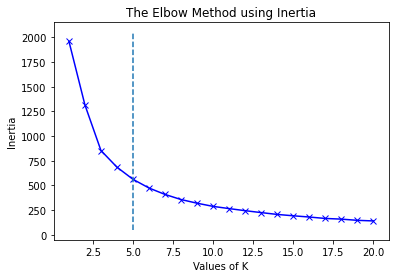

In [849]:
kn_int = KneeLocator(K, inertias, curve='convex', direction='decreasing')
print(f'Inertia K-Means : {kn_int.knee}')
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.vlines(kn_int.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

**Clustering with K-Means**


Converging centres:
[[-0.11928147  0.96109726]
 [-2.07364878 -0.24998518]
 [-0.64082557 -0.53944084]
 [ 0.7010039  -0.47543819]
 [-0.79650976 -1.11152227]]

[[-0.04895577  1.16661756]
 [-1.8634453  -0.16434191]
 [-0.48593037 -0.35692452]
 [ 1.06632267 -0.34760249]
 [-0.58796302 -1.20711917]]

[[-0.0688934   1.27674206]
 [-1.77230901 -0.16678841]
 [-0.37987058 -0.21647961]
 [ 1.31867493 -0.23436186]
 [-0.4294554  -1.18168781]]

[[-0.08703833  1.40946801]
 [-1.67505613 -0.22654761]
 [-0.29263594 -0.11031426]
 [ 1.48173003 -0.1635212 ]
 [-0.34699113 -1.13608242]]

[[-0.09797266  1.54819085]
 [-1.57003702 -0.27035664]
 [-0.21692209 -0.00515453]
 [ 1.56605483 -0.1424766 ]
 [-0.31142823 -1.0790992 ]]

[[-0.10098589  1.61829831]
 [-1.50021671 -0.27066845]
 [-0.16588613  0.06355403]
 [ 1.6289839  -0.13003552]
 [-0.28711975 -1.02852638]]

[[-0.10091578  1.69585927]
 [-1.41028196 -0.27524869]
 [-0.123576    0.11813504]
 [ 1.69272296 -0.11894586]
 [-0.25879697 -1.01045905]]

[[-0.11005915  1.747

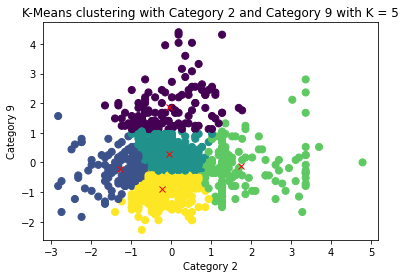

In [850]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    # The main loop
    # This loop continues until convergence.
    # You could make it run a set number of times by changing
    # it to say while x > 5, for example, and removing the break
    print("\nConverging centres:")
    while True:
        # 2a. Assign labels based on closest center
        # I am using the pairwise_distances_argmin method to
        # calculate distances between points to centres
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in
        range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

        # Print converging centres
        print(centers)
        print()

    return centers, labels

# Choose K value based on Invertia/Distortion
choose_k = 'int'
if(choose_k == 'dist'):
    clust_num = kn_dist.knee
elif(choose_k == 'int'):
    clust_num = kn_int.knee

centers, labels = find_clusters(X, clust_num)
centroids_x = centers[:,0]
centroids_y = centers[:,1]
plt.scatter(centroids_x,centroids_y,marker = "x",linewidths = 1, zorder = 10, c='red')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title(f'K-Means clustering with Category {a} and Category {b} with K = {clust_num}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

**See which user belong to the cluster**

In [851]:
from collections import Counter, defaultdict
print("\nNumber of Users in each cluster:")
print(Counter(labels))

# Get cluster indices
clusters_indices = defaultdict(list)
for index, c in enumerate(labels):
    clusters_indices[c].append(index)

# Print countries in each cluster and means
x = 0
while x < clust_num:
    print("\nCluster " + str(x + 1))
    print("----------")
    print(f"User | Category {a} | Category {b}")
    sum_x, sum_y, n = 0, 0, 0
    for i in clusters_indices[x]:
        n += 1
        sum_x += og_x[i]
        sum_y += og_y[i]
        print(f'{users[i]} <> {og_x[i]} <> {og_y[i]}')

    print(f"Mean Category {a} = {sum_x/n} [Cluster {str(x + 1)}]")
    print(f"Mean Category {b} = {sum_y/n} [Cluster {str(x + 1)}]")
    print("----------")
    x+=1


Number of Users in each cluster:
Counter({4: 296, 2: 285, 3: 148, 1: 128, 0: 123})

Cluster 1
----------
User | Category 2 | Category 9
User 10 <> 1.36 <> 2.24
User 14 <> 1.64 <> 2.3
User 15 <> 1.68 <> 2.02
User 35 <> 1.16 <> 2.02
User 45 <> 1.64 <> 1.98
User 47 <> 1.08 <> 2.18
User 63 <> 1.12 <> 2.08
User 83 <> 1.52 <> 2.05
User 99 <> 0.88 <> 2.14
User 100 <> 1.6 <> 3.04
User 107 <> 0.56 <> 2.27
User 110 <> 2.16 <> 2.24
User 111 <> 1.8 <> 2.46
User 135 <> 1.64 <> 2.5
User 136 <> 0.96 <> 2.14
User 144 <> 1.04 <> 2.37
User 145 <> 1.4 <> 2.21
User 156 <> 1.16 <> 2.08
User 158 <> 1.12 <> 1.98
User 162 <> 1.08 <> 2.21
User 168 <> 1.04 <> 2.18
User 171 <> 1.16 <> 2.18
User 181 <> 1.44 <> 2.18
User 185 <> 1.04 <> 2.18
User 186 <> 1.2 <> 1.98
User 194 <> 1.56 <> 2.05
User 231 <> 1.0 <> 2.11
User 243 <> 1.6 <> 2.69
User 244 <> 1.84 <> 2.5
User 245 <> 1.56 <> 2.4
User 256 <> 1.76 <> 2.43
User 262 <> 1.44 <> 2.05
User 264 <> 1.72 <> 2.46
User 269 <> 1.4 <> 2.18
User 278 <> 1.24 <> 2.18
User 288